In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')

mnist_path = '/media/UCSD Spring 2017/CSE 291/Homework2/train.csv'
mnist_df = pd.read_csv(mnist_path, header=None)

In [3]:
mnist_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42000,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_df=mnist_df.rename(index=int, columns={0: "class"})

In [5]:
mnist_df.tail()

,class,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42000,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
a=mnist_df['class']

In [7]:
del mnist_df['class']

In [8]:
mnist_df.insert(784,'class',a)

In [9]:
mnist_df.tail()

,1,2,3,4,5,6,7,8,9,10,...,776,777,778,779,780,781,782,783,784,class
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
41999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
42000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [10]:
mnist_df = mnist_df.ix[1:]

In [11]:
mnist=mnist_df.as_matrix()

In [12]:
mnist.shape

(42000, 785)

In [13]:
mnist[:5]

array([['0', '0', '0', ..., '0', '0', '1'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '1'],
       ['0', '0', '0', ..., '0', '0', '4'],
       ['0', '0', '0', ..., '0', '0', '0']], dtype=object)

In [14]:
#mnist_train_X=mnist[0:32000,0:784]
#mnist_train_Y=mnist[0:32000,784]
#mnist_test_X=mnist[32000:,0:784]
#mnist_test_Y=mnist[32000:,784]


In [15]:
from sklearn.model_selection import train_test_split
mnist_train_X, mnist_test_X,mnist_train_Y, mnist_test_Y = train_test_split(mnist[:,0:784],mnist[:,784], test_size=0.25, random_state=42)

In [16]:
mnist_train_X.shape

(31500, 784)

In [17]:
mnist_train_X=mnist_train_X.astype(int)
mnist_train_Y=mnist_train_Y.astype(int)
mnist_test_X=mnist_test_X.astype(int)
mnist_test_Y=mnist_test_Y.astype(int)

In [18]:
covariance=np.cov((mnist_train_X).T)

In [19]:
covariance.shape

(784, 784)

In [20]:
from numpy import linalg as LA
eig_val, eig_vec = LA.eig(covariance)

In [21]:
eig_vec=np.real(eig_vec)
eig_val=np.real(eig_val)

In [22]:
sorted_eig_val=np.sort(eig_val)[::-1]
index_sorted_eig_val=np.argsort(eig_val)[::-1]

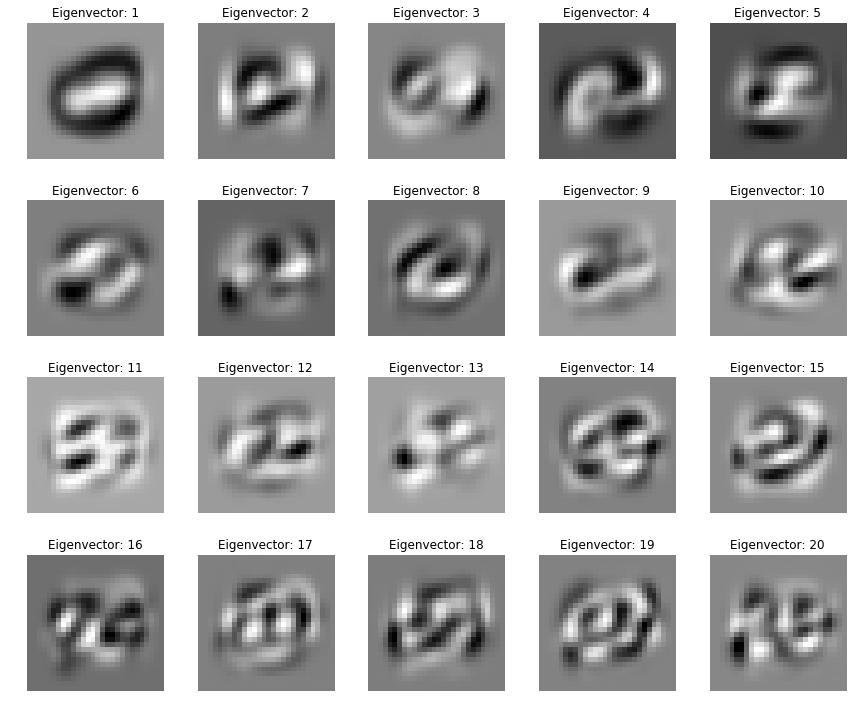

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
for i in range(20):
    example = eig_vec[:,index_sorted_eig_val[i]].reshape(28, 28).T
    plt.subplot(4, 5, i+1)
    plt.imshow(example, cmap='gray')
    plt.title("Eigenvector: {0}".format(i+1))
    plt.axis("off")
plt.tight_layout()
plt.show()

In [23]:
cumilative_sorted_eig_val=np.cumsum(sorted_eig_val)
norm_cumilative_sorted_eig_val=cumilative_sorted_eig_val/(max(cumilative_sorted_eig_val))

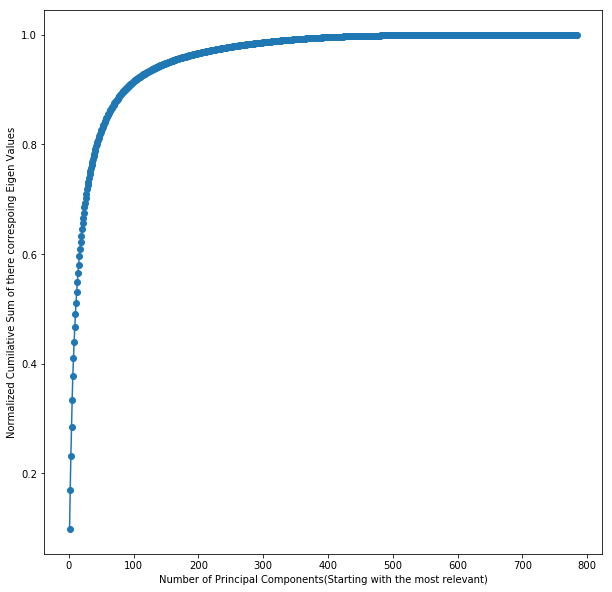

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(range(1,len(norm_cumilative_sorted_eig_val)+1), norm_cumilative_sorted_eig_val,marker='o')
plt.xlabel('Number of Principal Components(Starting with the most relevant)')
plt.ylabel('Normalized Cumilative Sum of there correspoing Eigen Values')
plt.show()

In [24]:
pca_components=eig_vec[:,index_sorted_eig_val[0]]
for i in range(len(eig_val)-1):
    pca_components=np.column_stack((pca_components,eig_vec[:,index_sorted_eig_val[i+1]]))

In [25]:
pca_components.shape

(784, 784)

In [26]:
#number_of_PCA_components
n=90;
mnist_train_X_mean=(mnist_train_X.T).mean(1)
temp=np.array([(mnist_train_X[i,:].T-mnist_train_X_mean) for i in range(len(mnist_train_X))])
mnist_train_X_classifier=temp.dot(pca_components[:,0:n])

In [27]:
mnist_train_X_classifier.shape

(31500, 90)

In [28]:
mnist_test_X_mean=(mnist_test_X.T).mean(1)
temp=np.array([(mnist_test_X[i,:].T-mnist_test_X_mean) for i in range(len(mnist_test_X))])
mnist_test_X_classifier=temp.dot(pca_components[:,0:n])

In [29]:
mnist_train_X_classifier.shape

(31500, 90)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss
from sklearn.utils import resample
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
max_n_trees=150
for i in range(1,max_n_trees+1):
    
    

In [32]:
n_features=np.ceil(np.sqrt(90))
n_features

10.0

In [59]:
temp=np.random.random_integers(1,90, size=(int(n_features)))

In [62]:
temp=mnist_train_X_classifier[:,temp]

IndexError: index 90 is out of bounds for axis 1 with size 90

In [61]:
temp.shape

(31500, 10)

In [115]:

n_trees=50;
X={}
y={}
clf={}
feature_imp = defaultdict(list)
features_index={}
data_index={}


for i in range(1,n_trees+1):
    
    data_index[i]=np.random.random_integers(0,len(mnist_train_X_classifier)-1, size=21000)
    features_index[i]=np.random.random_integers(0,89, size=(int(n_features)))
    y[i]=mnist_train_Y[data_index[i]]
    temp=mnist_train_X_classifier[data_index[i],:]
    X[i]=temp[:,features_index[i]]
    clf[i] = DecisionTreeClassifier(max_depth=None,random_state=0)
    clf[i].fit(X[i],y[i])
    imp=clf[i].feature_importances_ 
    iti=0;
    for j in features_index[i]:
        feature_imp[j].append(imp[iti])
        iti=iti+1;
    
    

In [116]:
avg_imp=[np.mean(feature_imp[j]) for j in range(0,90)]

In [117]:
avg_imp

[0.23783359913208266,
 0.16211629781910628,
 0.13671605424788202,
 0.14660512891191671,
 0.16162988912045187,
 0.14772653777073461,
 0.1181418319456911,
 0.12001023694358157,
 0.094530332480919452,
 0.11562942141299402,
 0.11609999283998056,
 0.11931678599990621,
 0.11251174823201915,
 0.11107029148649084,
 0.11265243866563202,
 0.12015160749037035,
 0.10848176914839279,
 0.11142310978250548,
 0.10362014399982708,
 0.10950849029366241,
 0.067301036358340033,
 0.10049731783715696,
 0.10992646469458296,
 0.10221026992817782,
 0.098464103795357069,
 0.10060228778649852,
 0.10219203767824157,
 0.090009408248332701,
 0.10588096171012484,
 0.080362499454809208,
 0.099436653117073864,
 0.10282627246983352,
 0.099650611229784997,
 0.097517087788552018,
 0.091207409951813645,
 0.10209485743880634,
 0.1051919285985931,
 0.095975532971280211,
 nan,
 0.083931425608980301,
 0.08602884771957045,
 0.10028963287514857,
 0.10319568016443036,
 0.072256340559998966,
 0.092787770414889809,
 0.098748004368

In [118]:
#Classification Test Error
from scipy import stats

test_pre_tree={}
test_pre=[]

for i in range(1,n_trees+1):
    test_pre_tree[i]=clf[i].predict(mnist_test_X_classifier[:,features_index[i]])
    
for j in range(len(mnist_test_Y)):
    temp=[];
    for i in range(1,n_trees+1):
        t=test_pre_tree[i]
        temp.append(t[j])
    a,b=stats.mode(temp)
    test_pre.append(a[0])   

In [89]:
d=[1,2,3,2]
a,b=stats.mode(d)
a[0]

2

In [94]:
test_pre[:5]

[8, 1, 9, 9, 8]

In [119]:
test_accuracy=accuracy_score(mnist_test_Y, test_pre)
test_accuracy

0.85352380952380957

In [123]:
#Out of Bag Accuracy

out_pre=[]
to=0;
ind=0
right=0
for j in range(len(mnist_train_X_classifier)):
    
    out_trees_pre=[]
    for i in range(1,n_trees+1):
        if j not in data_index[i]:
            out_trees_pre.append(clf[i].predict(mnist_train_X_classifier[j,features_index[i]]))
    if len(out_trees_pre) != 0:
        a,b=stats.mode(out_trees_pre)
        to=to+1;
        if a[0]==mnist_train_Y[ind]:
            right=right+1;
    ind=ind+1        

In [126]:
right/to

0.7686666666666667

In [98]:
out_accuracy=accuracy_score(mnist_train_Y, out_pre)
out_accuracy

0.91615873015873017

In [100]:
# Training Error

train_pre=[]
train_pre_tree={}

for i in range(1,n_trees+1):
    train_pre_tree[i]=clf[i].predict(mnist_train_X_classifier[:,features_index[i]])
    
for j in range(len(mnist_train_Y)):
    temp=[];
    for i in range(1,n_trees+1):
        t=train_pre_tree[i]
        temp.append(t[j])
    a,b=stats.mode(temp)
    train_pre.append(a[0]) 


In [101]:
train_accuracy=accuracy_score(mnist_train_Y, train_pre)
train_accuracy

0.91615873015873017

In [133]:
avg_imp = {}
test_accuracy={}
out_accuracy={}
train_accuracy={}
train_pre_forest={}
test_pre_forest={}

for n_trees in range(1,121,10):
    
    X={}
    y={}
    clf={}
    feature_imp = defaultdict(list)
    features_index={}
    test_pre_tree={}

    data_index={}
    train_pre=[]
    train_pre_tree={}

    for i in range(1,n_trees+1):
        
        data_index[i]=np.random.random_integers(0,len(mnist_train_X_classifier)-1, size=21000)
        features_index[i]=np.random.random_integers(0,89, size=(int(n_features)))
        y[i]=mnist_train_Y[data_index[i]]
        temp=mnist_train_X_classifier[data_index[i],:]
        X[i]=temp[:,features_index[i]]
        clf[i] = DecisionTreeClassifier(max_depth=None,random_state=0)
        clf[i].fit(X[i],y[i])
        imp=clf[i].feature_importances_ 
        test_pre_tree[i]=clf[i].predict(mnist_test_X_classifier[:,features_index[i]])
        train_pre_tree[i]=clf[i].predict(mnist_train_X_classifier[:,features_index[i]])
        
        
        iti=0;
        
        for j in features_index[i]:
            feature_imp[j].append(imp[iti])
            iti=iti+1;
            
    avg_imp[n_trees]=[np.mean(feature_imp[j]) for j in range(0,90)]
    
    
    #Classification Test Error
    test_pre=[]
    
    for j in range(len(mnist_test_Y)):
        temp=[];
        for i in range(1,n_trees+1):
            t=test_pre_tree[i]
            temp.append(t[j])
        a,b=stats.mode(temp)
        test_pre.append(a[0])
        
        
    test_accuracy[n_trees]=accuracy_score(mnist_test_Y, test_pre) 
    test_pre_forest[n_trees]=test_pre
    
    #print(n_trees," test_accuracy  ", test_accuracy[n_trees])
    
    
    
    #Out of Bag Accuracy

    
    to=0;
    ind=0
    right=0
    for j in range(len(mnist_train_X_classifier)):
    
        out_trees_pre=[]
        for i in range(1,n_trees+1):
            if j not in data_index[i]:
                out_trees_pre.append(clf[i].predict(mnist_train_X_classifier[j,features_index[i]]))
        if len(out_trees_pre) != 0:
            a,b=stats.mode(out_trees_pre)
            to=to+1;
            if a[0]==mnist_train_Y[ind]:
                right=right+1;
        ind=ind+1 
        
    out_accuracy[n_trees]=right/to;
    
    
    #print(n_trees," out_accuracy   ", out_accuracy[n_trees])  
        
    
    # Training Error

    
    for j in range(len(mnist_train_Y)):
        temp=[];
        for i in range(1,n_trees+1):
            t=train_pre_tree[i]
            temp.append(t[j])
        a,b=stats.mode(temp)
        train_pre.append(a[0]) 
        
    train_accuracy[n_trees]=accuracy_score(mnist_train_Y, train_pre) 
    train_pre_forest[n_trees]=train_pre
    
    #print(n_trees,"train_accuracy", train_accuracy[n_trees])    
        


In [141]:
len(train_accuracy.keys())

12

In [145]:
train_accuracy_array=[]
test_accuracy_array=[]
out_accuracy_array=[]

for i in range(1,121,10):
    train_accuracy_array.append(train_accuracy[i])
    test_accuracy_array.append(test_accuracy[i])
    out_accuracy_array.append(out_accuracy[i])

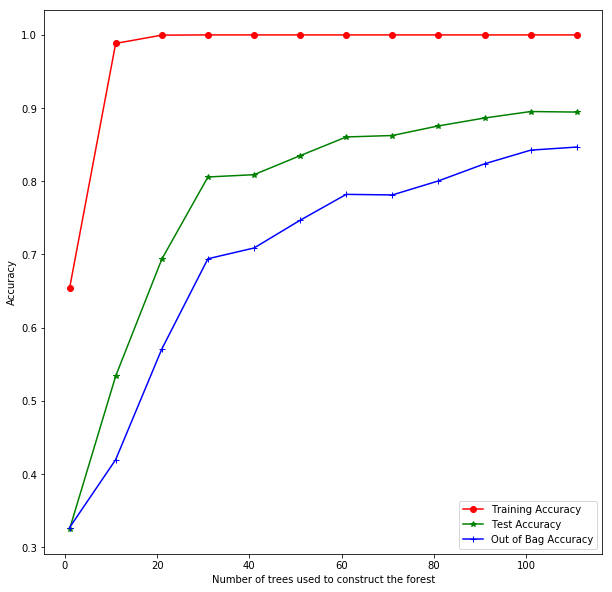

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.plot(range(1,121,10),train_accuracy_array,marker='o',color='r',label='Training Accuracy')
plt.plot(range(1,121,10),test_accuracy_array,marker='*',color='g',label='Test Accuracy')
plt.plot(range(1,121,10),out_accuracy_array,marker='+',color='b',label='Out of Bag Accuracy')



plt.xlabel('Number of trees used to construct the forest')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

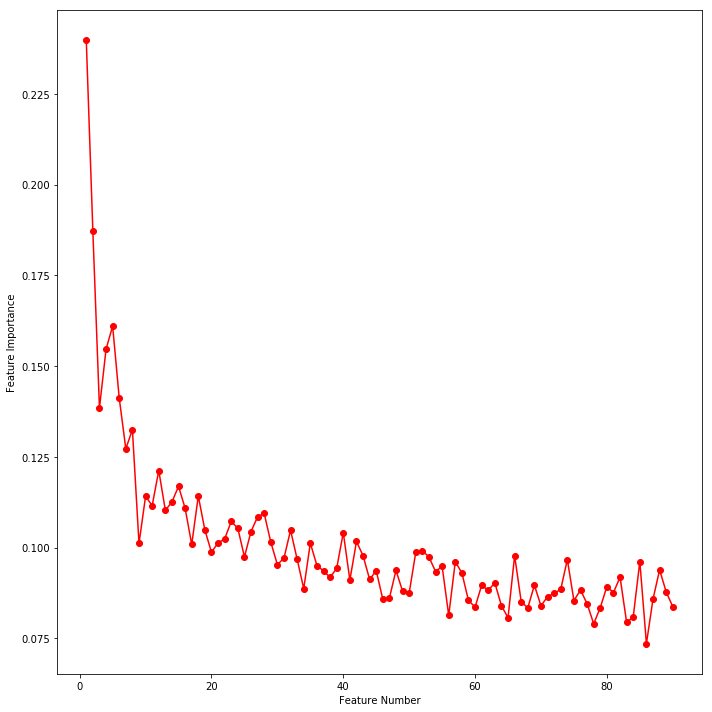

In [152]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.plot(range(1,91),avg_imp[111],marker='o',color='r')
plt.xlabel('Feature Number')
plt.ylabel('Feature Importance')
plt.tight_layout()
plt.show()

In [1]:
importances=avg_imp[111]
len(importances)

NameError: name 'avg_imp' is not defined

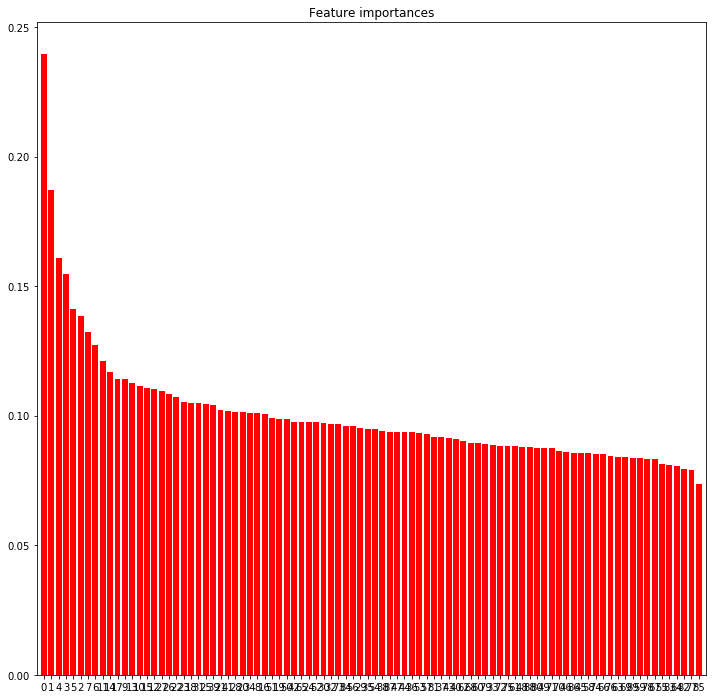

In [181]:
importances=avg_imp[111]
indices = np.argsort(importances)[::-1]
importances=np.sort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances,
       color="r", align="center")
plt.xticks(range(len(importances)), indices)
plt.xlim([-1, len(importances)])
plt.ylim(ymin=0)
plt.show()

In [45]:
import itertools   
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 995    0    2    2    2    3   14    0    5    2]
 [   0 1128    4    3    0    0    4    2    5    0]
 [  22    4  958   22   15    6    7    9   26    3]
 [  12    2   37  974    7   39    5   22   37   16]
 [   4    1   20    3  912    4   11   18    6   45]
 [  10    0    8   57   11  739   31    7   27    8]
 [  18    1    5    2    5   12  962    1    3    1]
 [   9   12   20    4   23    3    2 1018    7   37]
 [  28    7   34   49   11   30   13    3  817   13]
 [  14    4    9   19   40   12    4   33    9  890]]


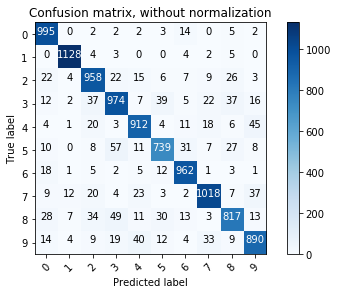

In [185]:
cnf_matrix = confusion_matrix(mnist_test_Y, test_pre_forest[111],labels=range(0,10))


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(0,10),
                      title='Confusion matrix, without normalization')
plt.show()

In [186]:
plt.show()

In [33]:
avg_imp_10 = {}
test_accuracy_10={}
out_accuracy_10={}
train_accuracy_10={}
train_pre_forest_10={}
test_pre_forest_10={}
    
for n_trees in range(1,121,10):
    
    X={}
    y={}
    clf={}
    feature_imp = defaultdict(list)
    features_index={}
    test_pre_tree={}

    data_index={}
    train_pre=[]
    train_pre_tree={}

    for i in range(1,n_trees+1):
        
        data_index[i]=np.random.random_integers(0,len(mnist_train_X_classifier)-1, size=21000)
        features_index[i]=np.random.random_integers(0,89, size=(int(n_features)))
        y[i]=mnist_train_Y[data_index[i]]
        temp=mnist_train_X_classifier[data_index[i],:]
        X[i]=temp[:,features_index[i]]
        clf[i] = DecisionTreeClassifier(max_depth=10,random_state=0)
        clf[i].fit(X[i],y[i])
        imp=clf[i].feature_importances_ 
        test_pre_tree[i]=clf[i].predict(mnist_test_X_classifier[:,features_index[i]])
        train_pre_tree[i]=clf[i].predict(mnist_train_X_classifier[:,features_index[i]])
        
        
        iti=0;
        
        for j in features_index[i]:
            feature_imp[j].append(imp[iti])
            iti=iti+1;
            
    avg_imp_10[n_trees]=[np.mean(feature_imp[j]) for j in range(0,90)]
    
    
    #Classification Test Error
    test_pre=[]
    
    for j in range(len(mnist_test_Y)):
        temp=[];
        for i in range(1,n_trees+1):
            t=test_pre_tree[i]
            temp.append(t[j])
        a,b=stats.mode(temp)
        test_pre.append(a[0])
        
        
    test_accuracy_10[n_trees]=accuracy_score(mnist_test_Y, test_pre) 
    test_pre_forest_10[n_trees]=test_pre
    
    print(n_trees," test_accuracy  ", test_accuracy_10[n_trees])
    
    
    
    #Out of Bag Accuracy

    
    to=0;
    ind=0
    right=0
    for j in range(len(mnist_train_X_classifier)):
    
        out_trees_pre=[]
        for i in range(1,n_trees+1):
            if j not in data_index[i]:
                out_trees_pre.append(clf[i].predict(mnist_train_X_classifier[j,features_index[i]]))
        if len(out_trees_pre) != 0:
            a,b=stats.mode(out_trees_pre)
            to=to+1;
            if a[0]==mnist_train_Y[ind]:
                right=right+1;
        ind=ind+1 
        
    out_accuracy_10[n_trees]=right/to;
    
    
    print(n_trees," out_accuracy   ", out_accuracy_10[n_trees])  
        
    
    # Training Error

    
    for j in range(len(mnist_train_Y)):
        temp=[];
        for i in range(1,n_trees+1):
            t=train_pre_tree[i]
            temp.append(t[j])
        a,b=stats.mode(temp)
        train_pre.append(a[0]) 
        
    train_accuracy_10[n_trees]=accuracy_score(mnist_train_Y, train_pre) 
    train_pre_forest_10[n_trees]=train_pre
    
    print(n_trees,"train_accuracy", train_accuracy_10[n_trees])  

1  test_accuracy   0.365904761905
1  out_accuracy    0.36692074115386997
1 train_accuracy 0.411714285714
11  test_accuracy   0.702857142857
11  out_accuracy    0.56757185961569
11 train_accuracy 0.800476190476
21  test_accuracy   0.634095238095
21  out_accuracy    0.5258412698412699
21 train_accuracy 0.788603174603
31  test_accuracy   0.774
31  out_accuracy    0.682031746031746
31 train_accuracy 0.880634920635
41  test_accuracy   0.782761904762
41  out_accuracy    0.6902857142857143
41 train_accuracy 0.90126984127
51  test_accuracy   0.822095238095
51  out_accuracy    0.7546349206349207
51 train_accuracy 0.917746031746
61  test_accuracy   0.838761904762
61  out_accuracy    0.7678730158730158
61 train_accuracy 0.937777777778
71  test_accuracy   0.855238095238
71  out_accuracy    0.8008571428571428
71 train_accuracy 0.946857142857
81  test_accuracy   0.859619047619
81  out_accuracy    0.806063492063492
81 train_accuracy 0.945904761905
91  test_accuracy   0.862
91  out_accuracy    0.81406

In [34]:
train_accuracy_array=[]
test_accuracy_array=[]
out_accuracy_array=[]

for i in range(1,121,10):
    train_accuracy_array.append(train_accuracy_10[i])
    test_accuracy_array.append(test_accuracy_10[i])
    out_accuracy_array.append(out_accuracy_10[i])

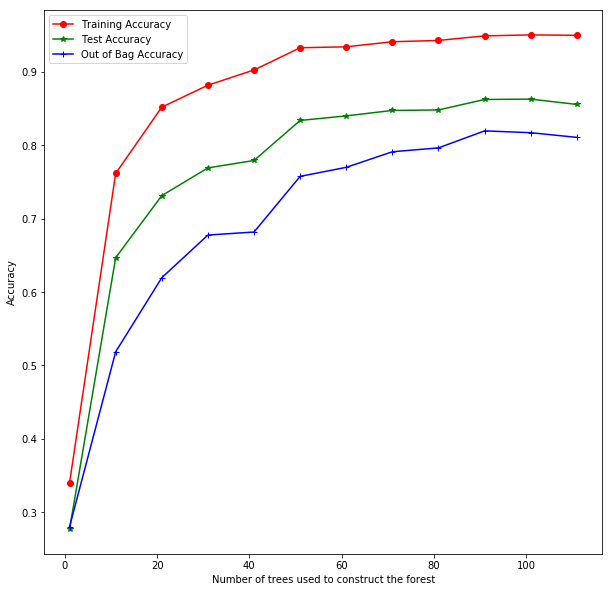

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.plot(range(1,121,10),train_accuracy_array,marker='o',color='r',label='Training Accuracy')
plt.plot(range(1,121,10),test_accuracy_array,marker='*',color='g',label='Test Accuracy')
plt.plot(range(1,121,10),out_accuracy_array,marker='+',color='b',label='Out of Bag Accuracy')



plt.xlabel('Number of trees used to construct the forest')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

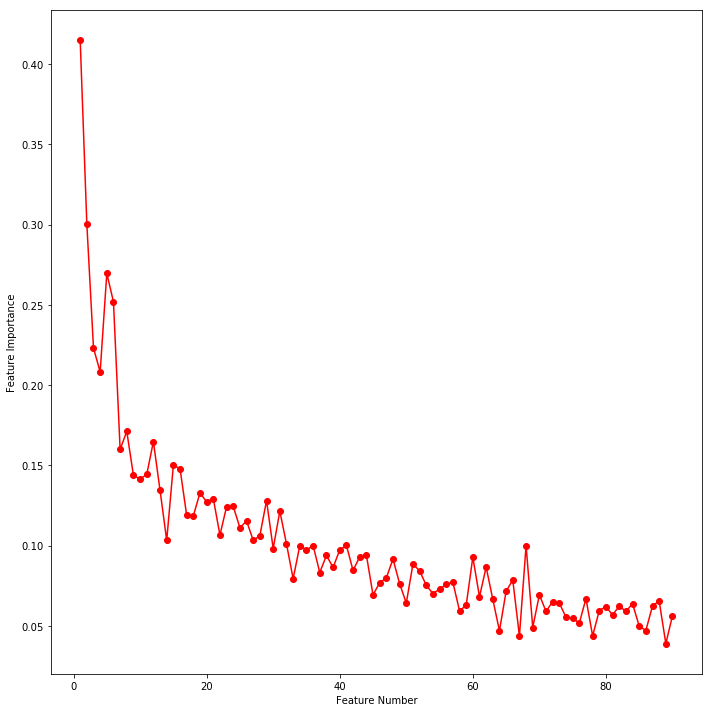

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.plot(range(1,91),avg_imp_10[111],marker='o',color='r')
plt.xlabel('Feature Number')
plt.ylabel('Feature Importance')
plt.tight_layout()
plt.show()

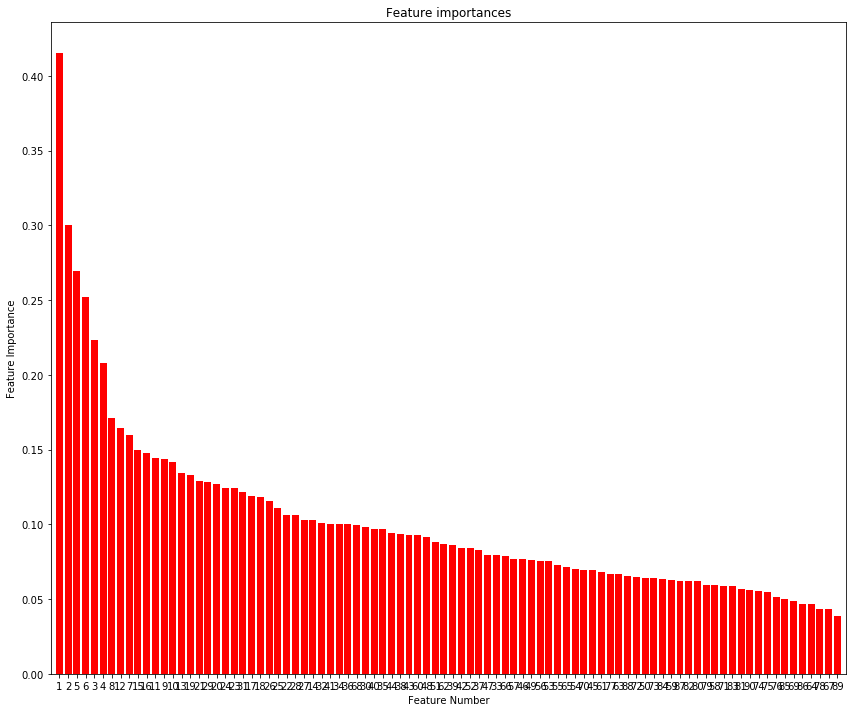

In [43]:
importances=avg_imp_10[111]
indices = np.argsort(importances)[::-1]
importances=np.sort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(12,10))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances,
       color="r", align="center")
plt.xticks(range(len(importances)), indices+1)
plt.xlim([-1, len(importances)])
plt.ylim(ymin=0)
plt.xlabel('Feature Number')
plt.ylabel('Feature Importance')
plt.tight_layout()
plt.show()

In [47]:
cnf_matrix = confusion_matrix(mnist_test_Y, test_pre_forest_10[111],labels=range(0,10))


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(0,10),
                      title='Confusion matrix, without normalization')


Confusion matrix, without normalization
[[ 981    6    5    3    3    2   17    4    4    0]
 [   1 1132    2    0    3    1    3    3    1    0]
 [  20   37  879   17   16    3   20   41   17   22]
 [  14   24   27  951    9   25   10   44   15   32]
 [   7   23    8    3  858    4   15   13    3   90]
 [  14   13    3   63    7  712   39   22   11   14]
 [  18    7    3    3    7   14  954    1    0    3]
 [   4   27    9    5   15    3    4 1031    4   33]
 [  23   43    9   55   19   16   19   18  781   22]
 [   6   14    8   14   25    6    3   56    5  897]]


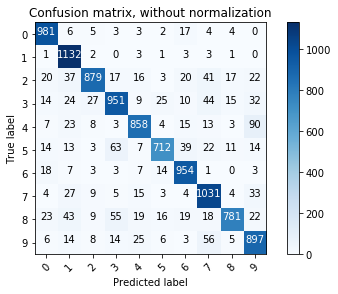

In [48]:
plt.show()

In [49]:
cnf_matrix = confusion_matrix(mnist_train_Y, train_pre_forest_10[111],labels=range(0,10))


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(0,10),
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[3069    9    0    1    2    3   16    5    1    1]
 [   1 3494   11    4    2    4    4   15    1    2]
 [   7   47 2942   10    7    0   13   60   12    7]
 [   8   36   18 3018    3   17    5   50    7   38]
 [   4   59    5    2 2857    3   12   16    0   90]
 [  13   18    0   57    8 2726   23   25    9   18]
 [   4    5    0    0    1   16 3095    5    1    0]
 [   7   39    5    2   10    1    1 3166    0   35]
 [  19   60   12   41   18   19   14   27 2812   36]
 [   5   32    4   26   22    3    1   68    6 2987]]


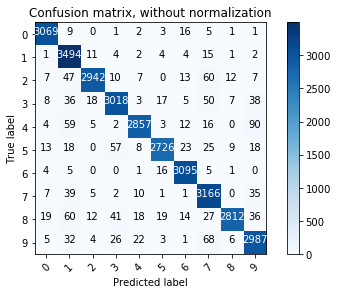

In [50]:
plt.show()